In [4]:
import pandas as pd
# Read the CSV file
file_path = r"C:\Users\surya\Downloads\E-Commerce Survey .csv"
df = pd.read_csv(file_path)

In [6]:
# Number of rows and columns
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 387
Number of columns: 20


In [7]:
# Frequency distribution of age groups
age_group_counts = df['Which age group do you belong to?'].value_counts()
print("Frequency distribution of age groups:")
print(age_group_counts)


Frequency distribution of age groups:
Which age group do you belong to?
18-24 years    301
55+ years       35
45-54 years     21
35-44 years     20
25-34 years     10
Name: count, dtype: int64


In [8]:
# Frequency distribution of gender
gender_counts = df['Gender'].value_counts()
print("\nFrequency distribution of gender:")
print(gender_counts)



Frequency distribution of gender:
Gender
Female    227
Male      157
Other       3
Name: count, dtype: int64


In [9]:
# Frequency distribution of gender
gender_counts = df['Gender'].value_counts()
print("\nFrequency distribution of gender:")
print(gender_counts)



Frequency distribution of gender:
Gender
Female    227
Male      157
Other       3
Name: count, dtype: int64


In [11]:
# Frequency distribution of purchase frequency
purchase_frequency_counts = df['How frequently do you purchase electronic gadgets online?'].value_counts()
print("\nFrequency distribution of purchase frequency:")
print(purchase_frequency_counts)



Frequency distribution of purchase frequency:
How frequently do you purchase electronic gadgets online?
Occasionally    227
Rarely          114
Frequently       29
Never            10
Always            7
Name: count, dtype: int64


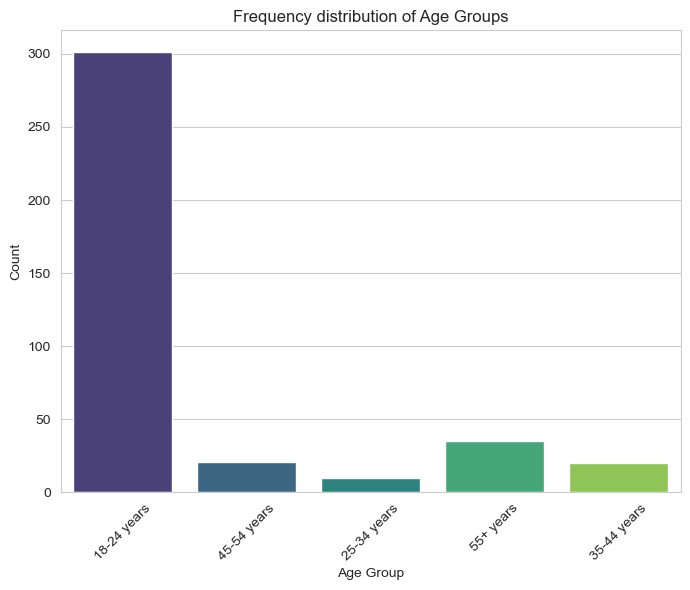

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Define a function to create bar plots
def plot_bar(data, xlabel, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=data, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Visualize the frequency distribution of age groups
plot_bar(df['Which age group do you belong to?'], xlabel='Age Group', title='Frequency distribution of Age Groups')

# Visualize the frequency distribution of gender



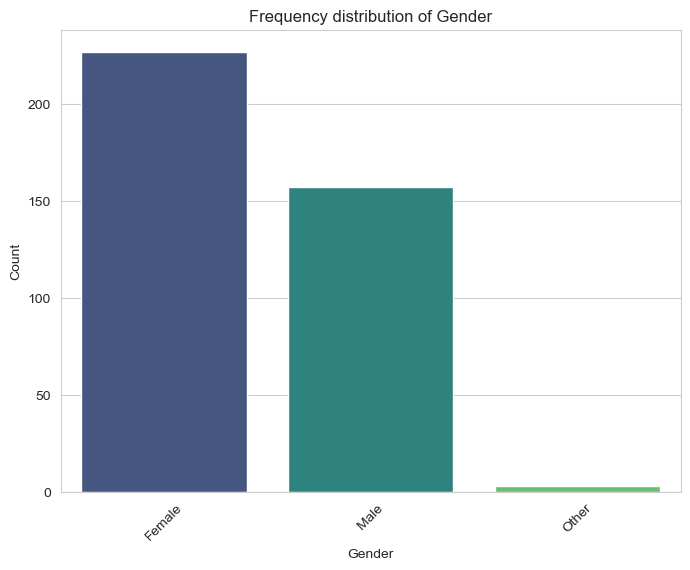

In [14]:
plot_bar(df['Gender'], xlabel='Gender', title='Frequency distribution of Gender')



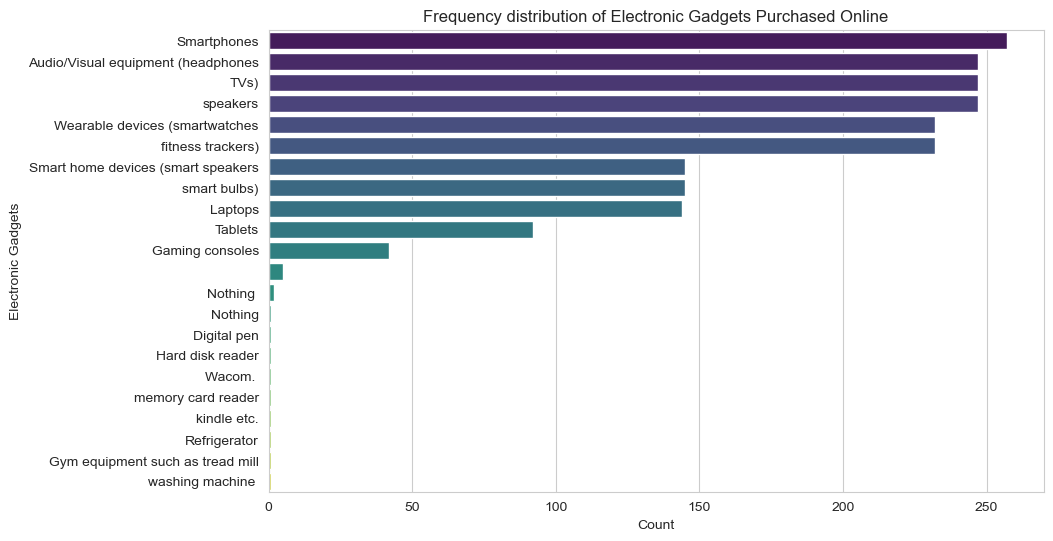

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the responses into separate categories
gadgets_df = df['What type of electronic gadgets do you typically purchase online? (Select all that apply)'].str.split(', ', expand=True)

# Melt the DataFrame to convert columns into rows
gadgets_df = gadgets_df.melt(var_name='Category', value_name='Response').dropna()

# Plot the frequency distribution of each category
plt.figure(figsize=(10, 6))
sns.countplot(data=gadgets_df, y='Response', order=gadgets_df['Response'].value_counts().index, palette='viridis')
plt.title('Frequency distribution of Electronic Gadgets Purchased Online')
plt.xlabel('Count')
plt.ylabel('Electronic Gadgets')
plt.show()


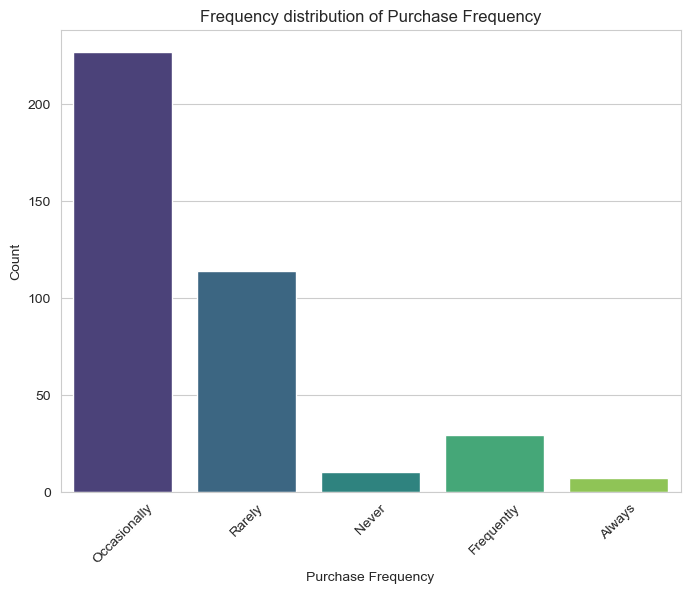

In [17]:
#Visualize the frequency distribution of purchase frequency
plot_bar(df['How frequently do you purchase electronic gadgets online?'], xlabel='Purchase Frequency', title='Frequency distribution of Purchase Frequency')

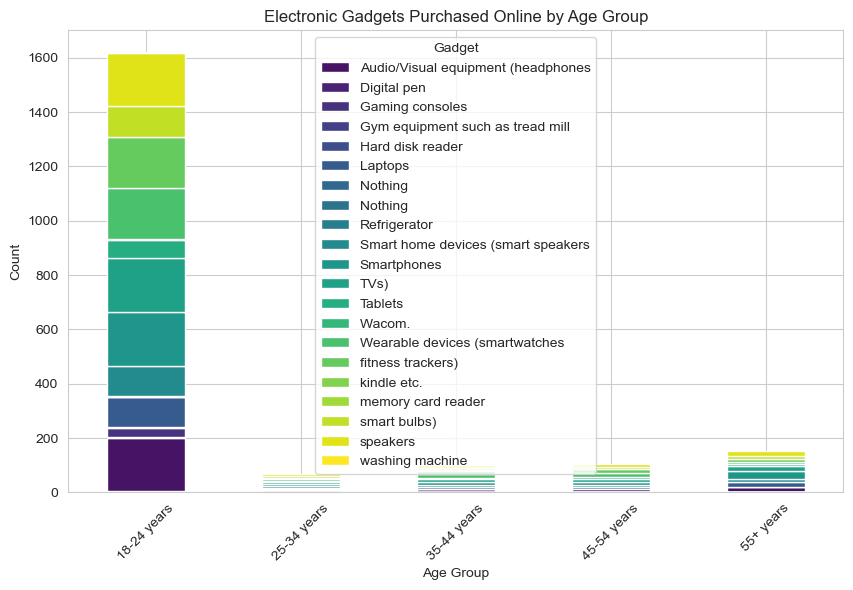

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Split the responses into separate categories
gadgets_df = df['What type of electronic gadgets do you typically purchase online? (Select all that apply)'].str.split(', ', expand=True)

# Add the 'Age Group' column to the gadgets DataFrame
gadgets_df['Age Group'] = df['Which age group do you belong to?']

# Melt the DataFrame to convert columns into rows
gadgets_df = gadgets_df.melt(id_vars=['Age Group'], value_name='Gadget').dropna()

# Count the occurrences of each gadget category within each age group
gadget_counts = gadgets_df.groupby(['Age Group', 'Gadget']).size().unstack(fill_value=0)

# Plot a stacked bar plot
gadget_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Electronic Gadgets Purchased Online by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gadget')
plt.show()


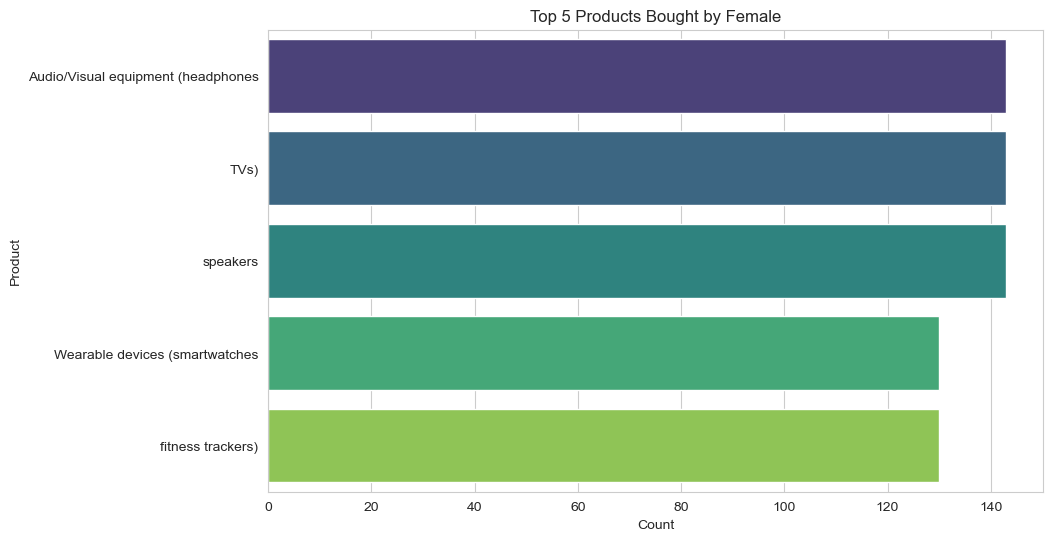

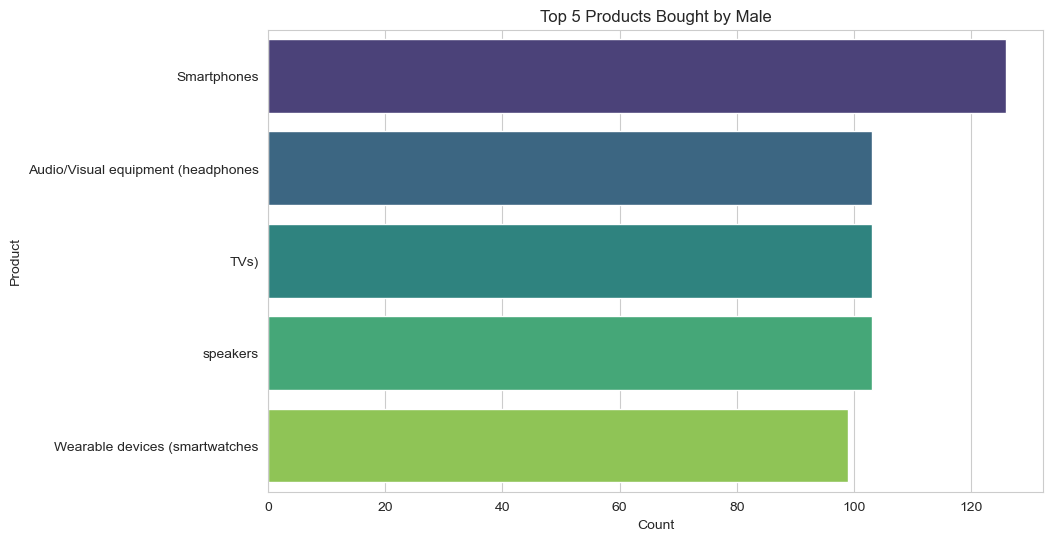

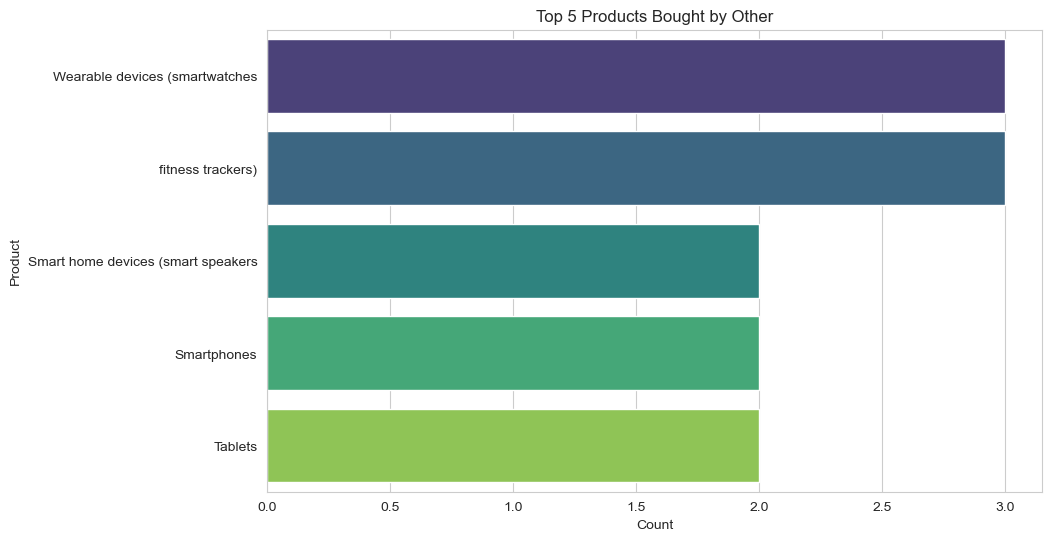

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the responses into separate categories
gadgets_df = df['What type of electronic gadgets do you typically purchase online? (Select all that apply)'].str.split(', ', expand=True)

# Add the 'Gender' column to the gadgets DataFrame
gadgets_df['Gender'] = df['Gender']

# Melt the DataFrame to convert columns into rows
gadgets_df = gadgets_df.melt(id_vars=['Gender'], value_name='Gadget').dropna()

# Count the occurrences of each gadget category within each gender
gadget_counts = gadgets_df.groupby(['Gender', 'Gadget']).size().reset_index(name='Count')

# Define a function to create bar plots for top 5 products
def plot_top_5_products(df):
    for gender in df['Gender'].unique():
        plt.figure(figsize=(10, 6))
        subset = df[df['Gender'] == gender]
        subset = subset.nlargest(5, 'Count')
        sns.barplot(data=subset, x='Count', y='Gadget', palette='viridis')
        plt.title(f'Top 5 Products Bought by {gender}')
        plt.xlabel('Count')
        plt.ylabel('Product')
        plt.show()

# Plot the top 5 products for each gender
plot_top_5_products(gadget_counts)


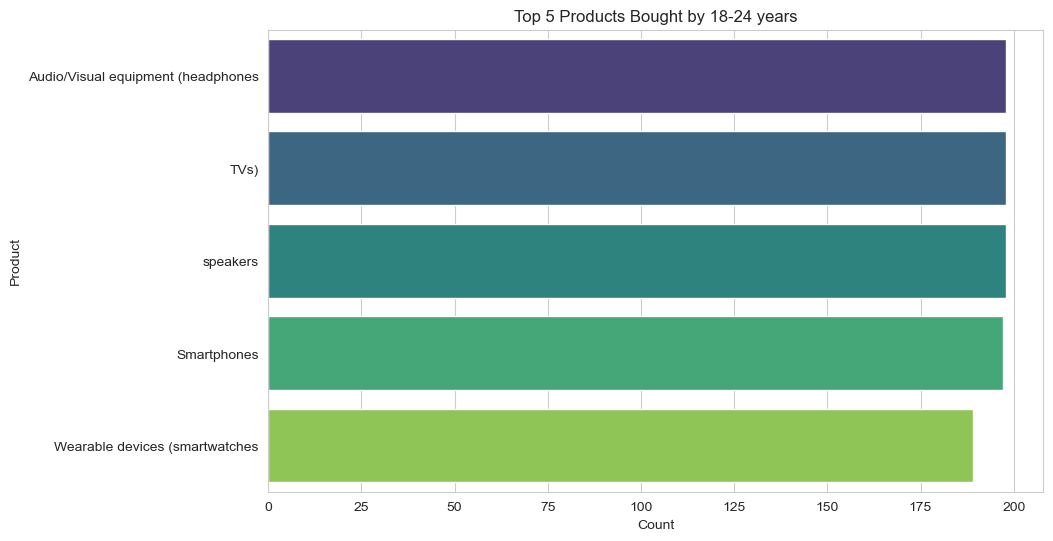

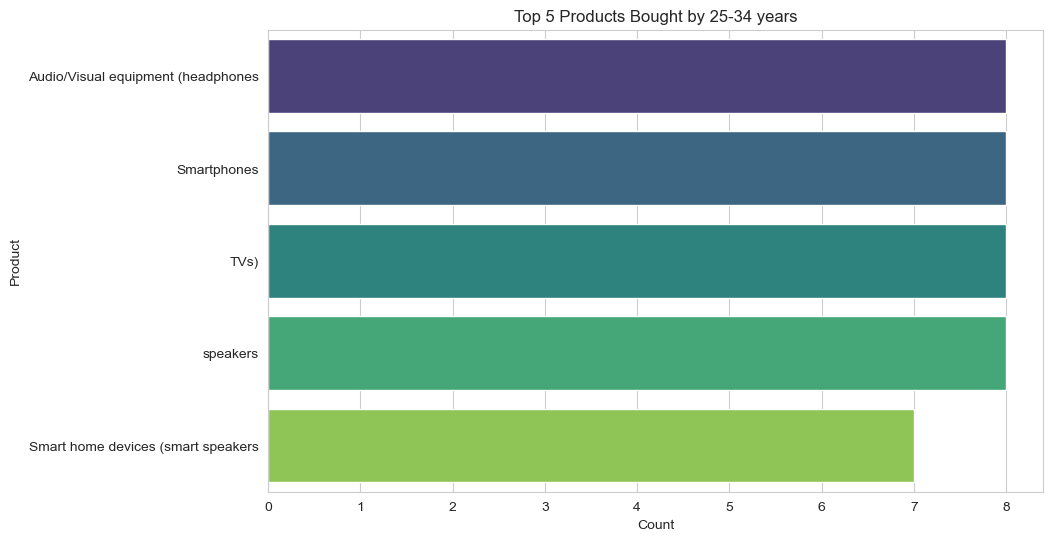

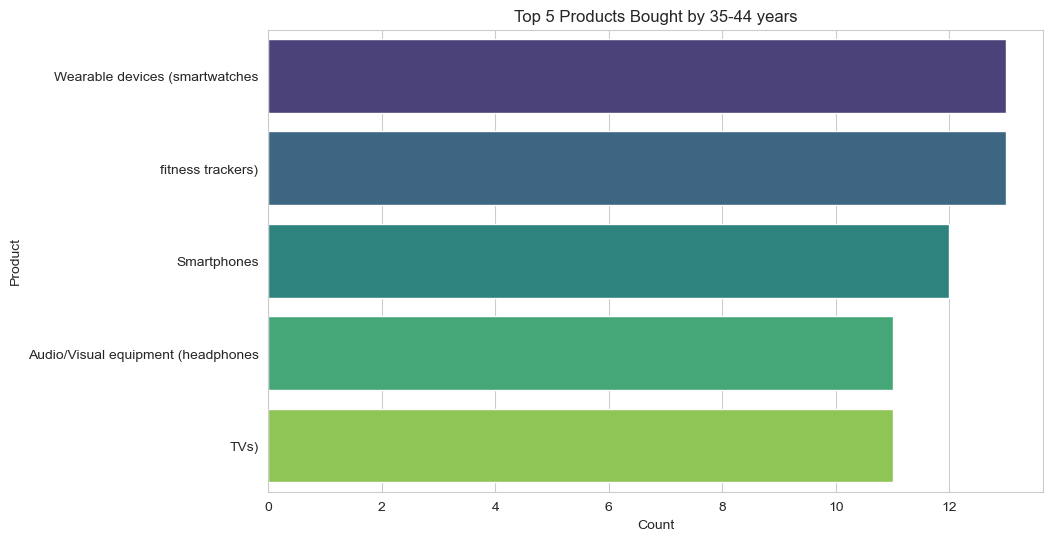

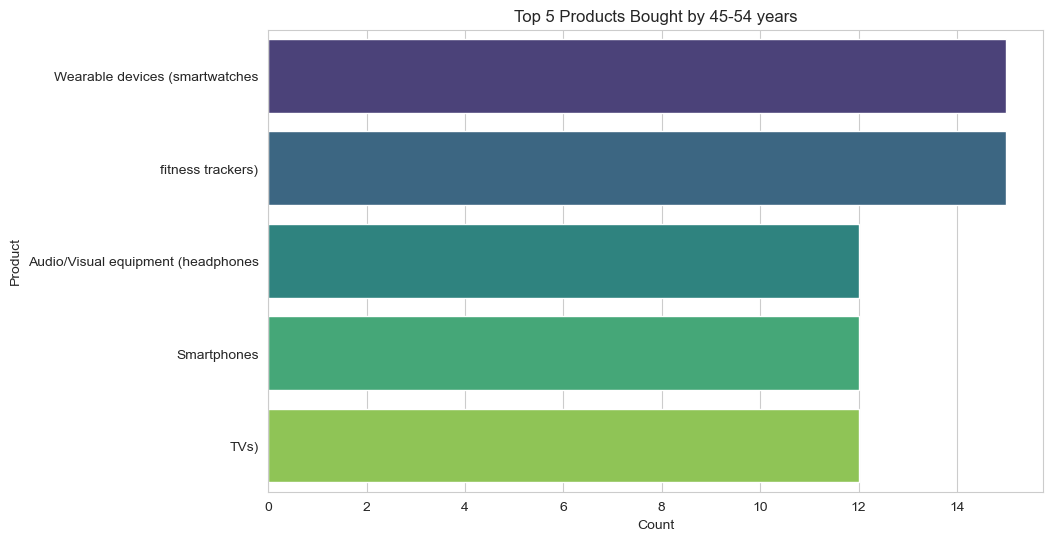

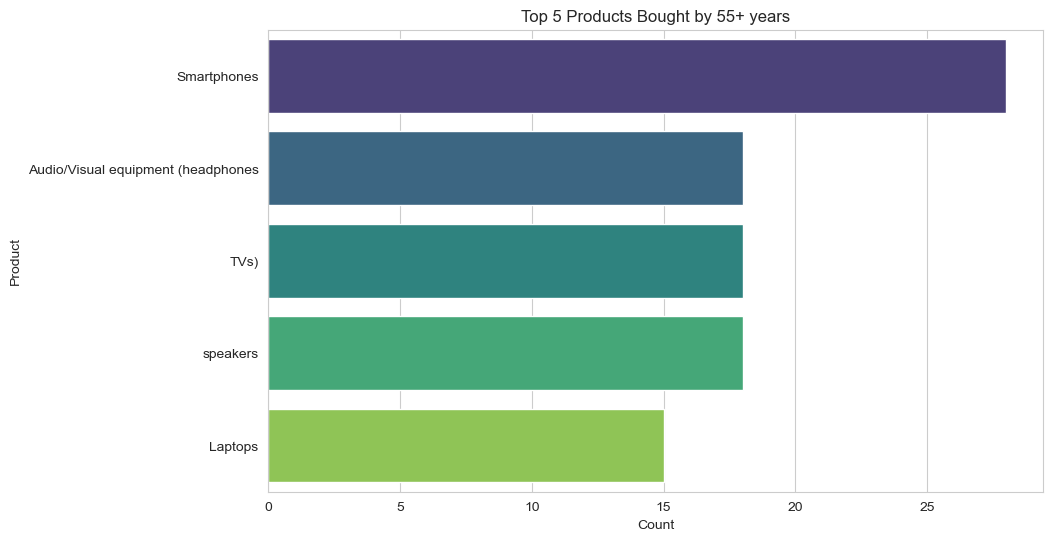

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the responses into separate categories
gadgets_df = df['What type of electronic gadgets do you typically purchase online? (Select all that apply)'].str.split(', ', expand=True)

# Add the 'Age Group' column to the gadgets DataFrame
gadgets_df['Age Group'] = df['Which age group do you belong to?']

# Melt the DataFrame to convert columns into rows
gadgets_df = gadgets_df.melt(id_vars=['Age Group'], value_name='Gadget').dropna()

# Count the occurrences of each gadget category within each age group
gadget_counts = gadgets_df.groupby(['Age Group', 'Gadget']).size().reset_index(name='Count')

# Define a function to create bar plots for top 5 products
def plot_top_5_products(df):
    for age_group in df['Age Group'].unique():
        plt.figure(figsize=(10, 6))
        subset = df[df['Age Group'] == age_group]
        subset = subset.nlargest(5, 'Count')
        sns.barplot(data=subset, x='Count', y='Gadget', palette='viridis')
        plt.title(f'Top 5 Products Bought by {age_group}')
        plt.xlabel('Count')
        plt.ylabel('Product')
        plt.show()

# Plot the top 5 products for each age group
plot_top_5_products(gadget_counts)


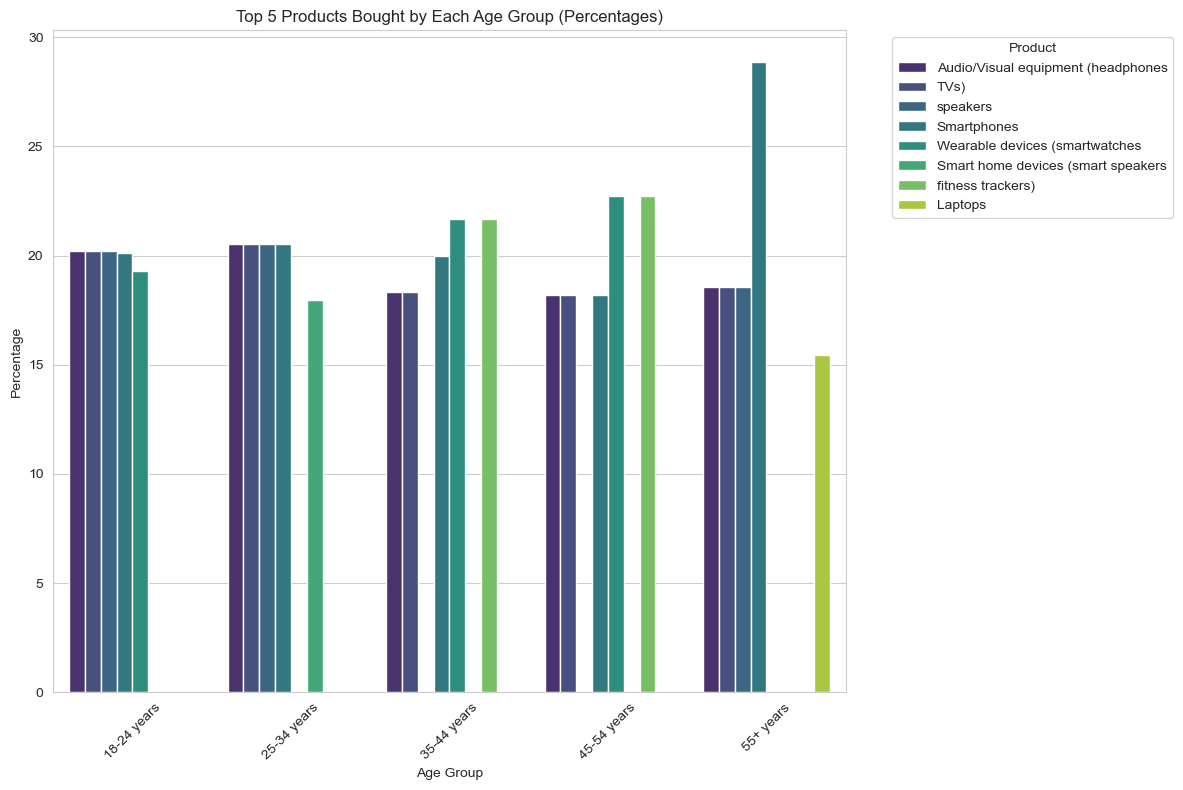

In [31]:
# Calculate the total count for each age group
total_counts = top_5_products.groupby('Age Group')['Count'].transform('sum')

# Calculate the percentage of each product within each age group
top_5_products['Percentage'] = (top_5_products['Count'] / total_counts) * 100

# Create a grouped bar plot showing percentages
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_products, x='Age Group', y='Percentage', hue='Gadget', palette='viridis')
plt.title('Top 5 Products Bought by Each Age Group (Percentages)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


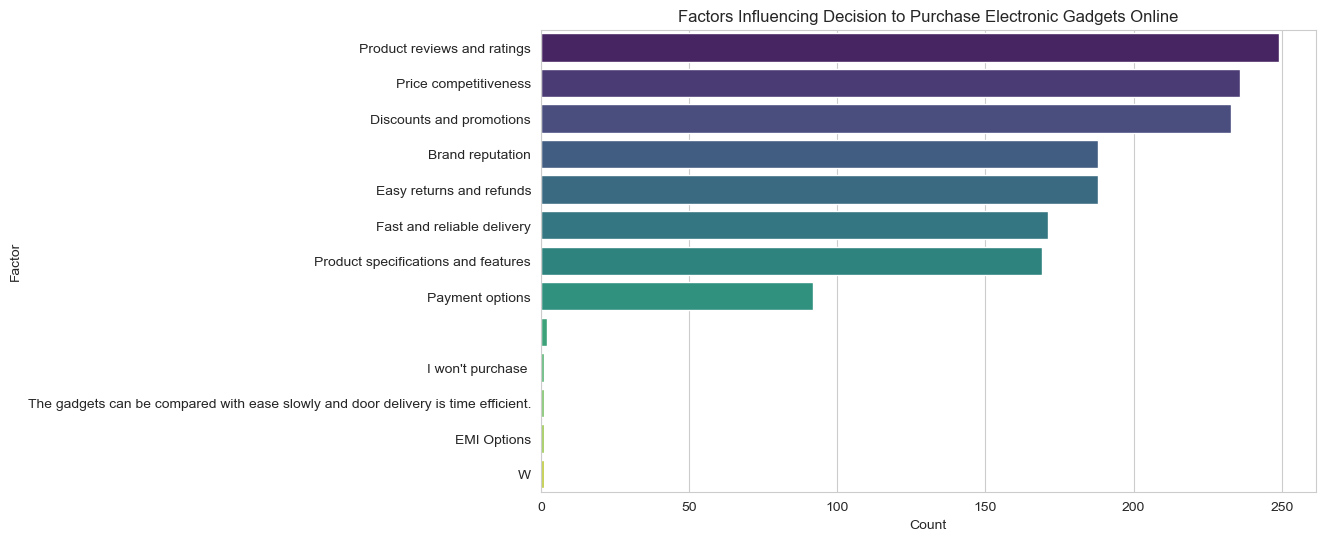

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split the responses into separate categories
factors_df = df['What factors influence your decision to purchase electronic gadgets online? (Select all that apply)'].str.split(', ', expand=True)

# Melt the DataFrame to convert columns into rows
factors_df = factors_df.melt(value_name='Factor').dropna()

# Count the occurrences of each factor
factor_counts = factors_df['Factor'].value_counts()

# Plot the frequency distribution of each factor
plt.figure(figsize=(10, 6))
sns.barplot(x=factor_counts.values, y=factor_counts.index, palette='viridis')
plt.title('Factors Influencing Decision to Purchase Electronic Gadgets Online')
plt.xlabel('Count')
plt.ylabel('Factor')
plt.show()


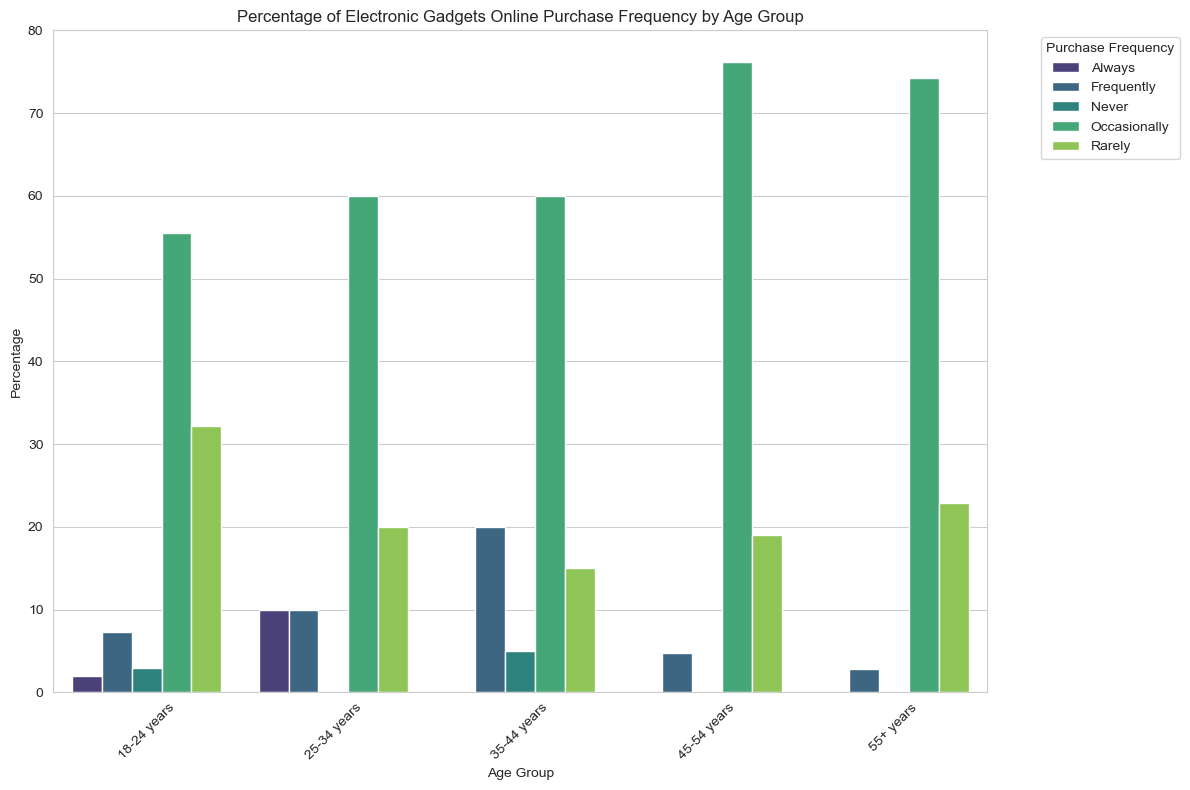

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
purchase_frequency_df = df[['Which age group do you belong to?', 'How frequently do you purchase electronic gadgets online?']]

# Rename columns for convenience
purchase_frequency_df.columns = ['Age Group', 'Purchase Frequency']

# Count the total number of respondents in each age group
total_counts = purchase_frequency_df['Age Group'].value_counts()

# Group by age group and purchase frequency, and count the occurrences
purchase_frequency_counts = purchase_frequency_df.groupby(['Age Group', 'Purchase Frequency']).size().reset_index(name='Count')

# Calculate the percentage for each age group and purchase frequency
purchase_frequency_counts['Percentage'] = purchase_frequency_counts.apply(lambda row: (row['Count'] / total_counts[row['Age Group']]) * 100, axis=1)

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=purchase_frequency_counts, x='Age Group', y='Percentage', hue='Purchase Frequency', palette='viridis')
plt.title('Percentage of Electronic Gadgets Online Purchase Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Purchase Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
